In [17]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [8]:
from keras.datasets import reuters

(X_train ,Y_train), (X_test, Y_test) = reuters.load_data(num_words = 1000, test_split = 0.2)

In [9]:
category = np.max(y_train) + 1
print(category,'카테고리')
print(len(X_train), '학습용 기사')
print(len(X_test), '테스트용 기사')
print(X_train[0])

46 카테고리
8982 학습용 기사
2246 테스트용 기사
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [10]:
from keras.preprocessing import sequence
from keras.utils import np_utils

x_train = sequence.pad_sequences(X_train, maxlen=100)
x_test = sequence.pad_sequences(X_test, maxlen = 100)

In [11]:
y_train = np_utils.to_categorical(Y_train)
y_test = np_utils.to_categorical(Y_test)

In [12]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense

model = Sequential()
model.add(Embedding(1000,100))
model.add(LSTM(100, activation = 'tanh'))
model.add(Dense(46, activation = 'softmax'))

In [16]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

history = model.fit(x_train, y_train, batch_size = 100, epochs = 20, validation_data = (x_test, y_test))

print("\n Test Accuracy : %.4f" %(model.evaluate(x_test, y_test)[1]))

Epoch 1/20
90/90 [==============================] - 22s 219ms/step - loss: 2.5801 - accuracy: 0.3632 - val_loss: 2.0939 - val_accuracy: 0.4858
Epoch 2/20
90/90 [==============================] - 20s 223ms/step - loss: 1.9628 - accuracy: 0.4971 - val_loss: 1.8638 - val_accuracy: 0.5263
Epoch 3/20
90/90 [==============================] - 20s 224ms/step - loss: 1.7756 - accuracy: 0.5415 - val_loss: 1.7526 - val_accuracy: 0.5552
Epoch 4/20
90/90 [==============================] - 19s 217ms/step - loss: 1.7160 - accuracy: 0.5522 - val_loss: 1.6999 - val_accuracy: 0.5521
Epoch 5/20
90/90 [==============================] - 19s 217ms/step - loss: 1.5906 - accuracy: 0.5930 - val_loss: 1.5741 - val_accuracy: 0.6077
Epoch 6/20
90/90 [==============================] - 22s 250ms/step - loss: 1.4453 - accuracy: 0.6367 - val_loss: 1.5306 - val_accuracy: 0.6077
Epoch 7/20
90/90 [==============================] - 23s 260ms/step - loss: 1.3508 - accuracy: 0.6549 - val_loss: 1.4315 - val_accuracy: 0.6300

In [18]:
#테스트셋과 학습셋의 오차
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

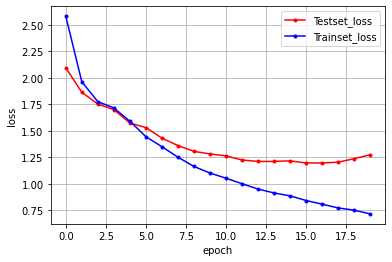

In [19]:
x_len = np.arange(len(y_vloss))
plt.plot(x_len, y_vloss, marker = '.', c = 'red', label = 'Testset_loss')
plt.plot(x_len, y_loss, marker = '.', c = 'blue', label = 'Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()